In [1]:
# Import required libraries and read the files into dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


file1 = ("raw_data/city_data.csv")
file2 = ("raw_data/ride_data.csv")

city_data_df = pd.read_csv(file1)
ride_data_df = pd.read_csv(file2)


In [2]:
#Merge dataframes 

city_ride_df1 = pd.merge(ride_data_df,city_data_df, how = 'inner',on = 'city')
#city_ride_df.to_csv("city_ride.csv",sep =",")
city_ride_df = city_ride_df1.drop_duplicates(subset=["fare","ride_id"],keep="first")
city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [3]:
#Urban,Sub-urban,Rural Dataframes
urban_df = city_ride_df.loc[city_ride_df["type"]=="Urban"]
surban_df = city_ride_df.loc[city_ride_df["type"]=="Suburban"]
rural_df = city_ride_df.loc[city_ride_df["type"]=="Rural"]

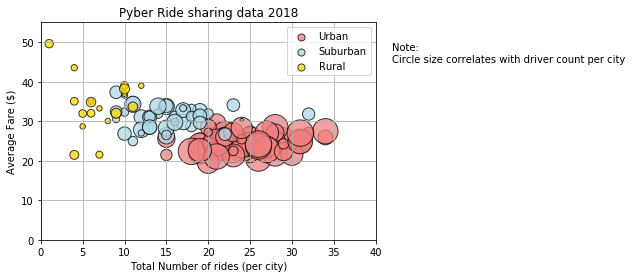

In [4]:
#Total Rides per city
urban_rides = urban_df.groupby("city")["ride_id"].count()
surban_rides = surban_df.groupby("city")["ride_id"].count()
rural_rides = rural_df.groupby("city")["ride_id"].count()

#Avg Fare per city 
urban_avg = round(urban_df.groupby("city")["fare"].mean(),2)
surban_avg = round(surban_df.groupby("city")["fare"].mean(),2)
rural_avg = round(rural_df.groupby("city")["fare"].mean(),2)

#Total Drivers per city
urban_df_unique = urban_df.drop_duplicates(subset=["city","driver_count"], keep='first')
surban_df_unique = surban_df.drop_duplicates(subset=["city","driver_count"], keep='first')
rural_df_unique = rural_df.drop_duplicates(subset=["city","driver_count"], keep='first')

urban_drivers = urban_df_unique.groupby("city")["driver_count"].sum()
surban_drivers = surban_df_unique.groupby("city")["driver_count"].sum()
rural_drivers = rural_df_unique.groupby("city")["driver_count"].sum()

urban_plot_df = pd.DataFrame({"Urban Avg": urban_avg,"Urban Rides":urban_rides,"Urban Drivers":urban_drivers})
surban_plot_df = pd.DataFrame({"Suburban Avg": surban_avg,"Suburban Rides":surban_rides,"Suburban Drivers":surban_drivers})
rural_plot_df = pd.DataFrame({"Rural Avg": rural_avg,"Rural Rides":rural_rides,"Rural Drivers":rural_drivers})

plt.scatter(urban_rides,urban_avg,s=urban_drivers*10,color = 'lightcoral', edgecolor='black',label='Urban',alpha=0.75)
plt.scatter(surban_rides,surban_avg,s=surban_drivers*10,color = 'lightblue', edgecolor='black',label='Suburban',alpha=0.75)
plt.scatter(rural_rides,rural_avg,s=rural_drivers*10,color = 'gold', edgecolor='black',label='Rural',alpha=0.75)
plt.title('Pyber Ride sharing data 2018')
plt.xlabel('Total Number of rides (per city)')
plt.ylabel('Average Fare ($)')
plt.xlim(0, 40)
plt.ylim(0, 55)
lgnd = plt.legend(scatterpoints=1)
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]
plt.annotate(s='Note:\nCircle size correlates with driver count per city', xy=(0,15), xytext=(42,45))
plt.grid()
plt.show()


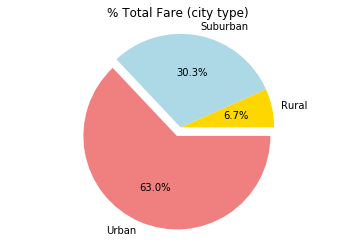

In [5]:
#Total Fare by city type
total_fare = round(city_ride_df.groupby("type")["fare"].sum(),1)
plt.pie(total_fare,explode=(0,0,0.1),colors = ["gold", "lightblue", "lightcoral"],autopct="%1.1f%%", labels=["Rural","Suburban","Urban"])
plt.axis("equal")
plt.title("% Total Fare (city type)")
plt.show()


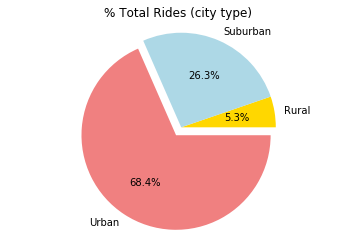

In [6]:
#Total Rides by city type
total_rides = city_ride_df.groupby("type")["ride_id"].count()
plt.pie(total_rides,explode=(0,0,0.1),colors = ["gold", "lightblue", "lightcoral"],autopct="%1.1f%%", labels=["Rural","Suburban","Urban"])
plt.axis("equal")
plt.title("% Total Rides (city type)")
plt.show()


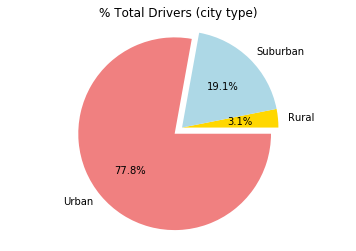

,city,driver_count,type
84,Port James,15,Suburban
100,Port James,3,Suburban


In [7]:
#Total Drivers by city type
city_ride_dup = city_data_df.drop_duplicates(["city","driver_count"],keep='first')
total_drivers = city_ride_dup.groupby("type")["driver_count"].sum()
plt.pie(total_drivers,explode=(0,0,0.1),colors = ["gold", "lightblue", "lightcoral"],autopct="%1.1f%%", labels=["Rural","Suburban","Urban"])
plt.axis("equal")
plt.title("% Total Drivers (city type)")
plt.show() 
city_ride_dup.loc[city_ride_dup["city"] == "Port James"]